<a href="https://colab.research.google.com/github/knkamil/Exam-Prediction-Success-ml/blob/main/Model_evaluation_and_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
# Step 2:Create Sample Data
data = {
    'study_hours': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'sleep_hours': [8, 7, 6, 7, 5, 6, 4, 3, 5, 4],
    'pass_exam': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1,] # 1 = Pass, 0 = Fail
}

df = pd.DataFrame(data)
print("Sample Data:")
print(df)

Sample Data:
   study_hours  sleep_hours  pass_exam
0            2            8          0
1            3            7          0
2            4            6          0
3            5            7          1
4            6            5          1
5            7            6          1
6            8            4          1
7            9            3          1
8           10            5          1
9           11            4          1


In [62]:
# Step 3: Split features (X) and (y)
X = df[['study_hours', 'sleep_hours']]
y = df['pass_exam']

In [63]:
X

,study_hours,sleep_hours
0,2,8
1,3,7
2,4,6
3,5,7
4,6,5
5,7,6
6,8,4
7,9,3
8,10,5
9,11,4


In [64]:
y

,pass_exam
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [65]:
# Step 4: Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data:")
print(X_train)

print("\nTest Data:")
print(X_test)


Training Data:
   study_hours  sleep_hours
5            7            6
0            2            8
7            9            3
2            4            6
9           11            4
4            6            5
3            5            7
6            8            4

Test Data:
   study_hours  sleep_hours
8           10            5
1            3            7


In [66]:
# Step 5: Train a model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [68]:
# Step 7: Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [69]:
# Step 1: Install and Import Libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [70]:
# Step 2: Load datasets
data = load_iris()
X , y = data.data, data.target

In [71]:
# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Step 4: Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [73]:
# Step 5: Make Predictions
y_pred = model.predict(X_test)

In [74]:
# Step 6: Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [75]:
# Step 7: Cross-validation
kfold = KFold(n_splits = 5)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cv_results)
print("Average CV accuracy:", np.mean(cv_results))

Cross-validation scores: [1.         1.         0.86666667 0.93333333 0.83333333]
Average CV accuracy: 0.9266666666666665


In [76]:
# Step 8: Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [77]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [78]:
# Step 1: Create imbalanced datasets
X, y = make_classification(n_samples=1000, n_features=10,n_classes =2, weights=[0.95, 0.05], random_state=42)

In [79]:
# Step 2: Split Data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Step 3:Train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [59]:
# Step 4: Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.945
Precision: 0.6666666666666666
Recall: 0.16666666666666666
F1 Score: 0.26666666666666666
AUC: 0.8554964539007093


In [81]:
# Step 5: Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[187   1]
 [ 10   2]]


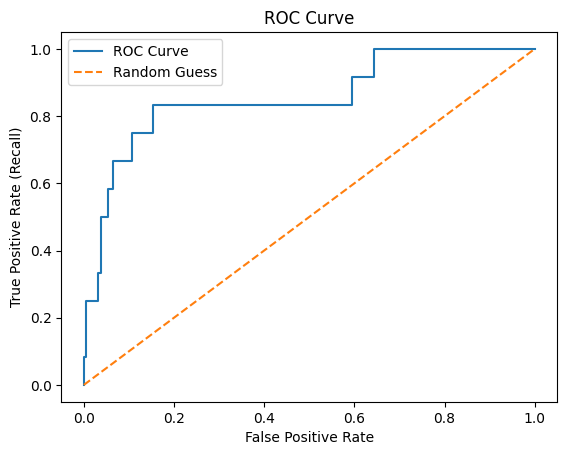

In [82]:
# Step 6: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0,1],[0, 1],'--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()